**Author: Sasni**\
**IID ID: 20200168**\
**UOW ID: w1867409**\
**Final Python Notebook 2**\
**Peer Reviewer: - (Defer Student)**\
**Review Date: - (Defer Student)**\
**Module Leader : Mr. Nipuna Senanayake**

## 1. Setting Up the Environment

*This code connects to your Google Drive account from Google Colab. It's essential for accessing your stored datasets and saving results without having to re-upload files each time you run the notebook.*

In [ ]:
# Establishing connection to Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*This code imports all the necessary Python libraries for our analysis. Pandas and NumPy handle data manipulation, Matplotlib creates visualizations, and scikit-learn provides tools for preprocessing data, building machine learning models, and evaluating their performance with various metrics.*

In [ ]:
# Loading essential libraries for data analysis and modeling
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
# Data preprocessing utilities
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Model training and evaluation tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
# Classification algorithms
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## 2. Loading and Exploring the Data

*This code loads the preprocessed breast cancer dataset from Google Drive. Using the classification-specific dataset that was prepared in the previous notebook, which contains features selected for predicting mortality.*

In [ ]:
# Importing the preprocessed classification dataset
classification_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_classification_dataset.csv")

*This code performs initial exploratory data analysis to understand our dataset. Examine the first few rows to see the feature values, check the data types and missing values with info(), and analyze the distribution of our target variable to understand if we're dealing with balanced or imbalanced classes.*

In [ ]:
# Examining the dataset structure
print("Dataset Preview:")
classification_df.head()

Dataset Preview:


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,68,0,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,Alive
1,50,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,Alive
2,58,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,Alive
3,58,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,Alive
4,47,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,Alive


In [ ]:
# Displaying dataset information
print("\nDataset Info:")
classification_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4007 non-null   int64  
 1   Sex                     4007 non-null   int64  
 2   T_Stage                 4007 non-null   object 
 3   N_Stage                 4007 non-null   object 
 4   6th_Stage               4007 non-null   object 
 5   Differentiated          4007 non-null   object 
 6   Grade                   4007 non-null   int64  
 7   A_Stage                 4007 non-null   object 
 8   Tumor_Size              4007 non-null   float64
 9   Estrogen_Status         4007 non-null   object 
 10  Progesterone_Status     4007 non-null   object 
 11  Regional_Node_Examined  4007 non-null   int64  
 12  Regional_Node_Positive  4007 non-null   int64  
 13  Mortality_Status        4007 non-null   object 
dtypes: float64(1), int64(5), 

In [ ]:
# Checking target variable distribution
print("\nClass Distribution:")
classification_df["Mortality_Status"].value_counts()


Class Distribution:


,count
Mortality_Status,
Alive,3393
Dead,614


## 3. Data Visualization

*This code creates a bar chart visualizing the class distribution in our dataset. Use of color coding (green for alive, red for dead) to intuitively represent the two classes and add numerical labels to show exact counts. This visualization helps us identify any class imbalance, which is critical for choosing appropriate modeling strategies and evaluation metrics.*

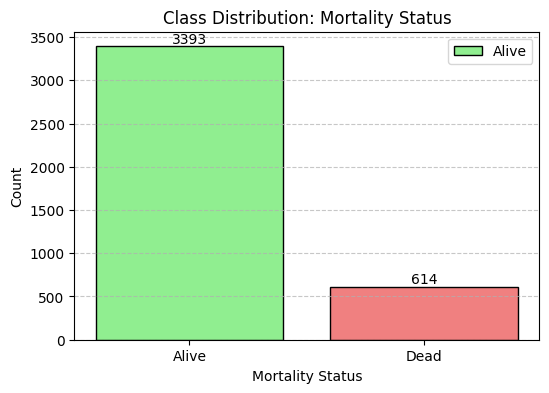

In [ ]:
# Creating a visual representation of class distribution
plt.figure(figsize=(6, 4))

# Calculating frequency counts
mortality_counts = classification_df["Mortality_Status"].value_counts()

# Defining colors for visual distinction
colors = ['lightgreen', 'lightcoral']  # Green for Alive, Red for Dead

# Generating bar chart with color coding
bars = plt.bar(mortality_counts.index, mortality_counts.values, color=colors, edgecolor='black')

# Adding data labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.0f}',
             ha='center', va='bottom')

# Configuring chart appearance
plt.title("Class Distribution: Mortality Status")
plt.xlabel("Mortality Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Alive', 'Dead'])

# Displaying the completed visualization
plt.show()

## 4. Data Preprocessing

*This code transforms any remaining categorical text data into numerical values. Machine learning algorithms require numerical inputs, LabelEncoder to convert text categories into integers. Store these encoders in a dictionary in case we need to convert predictions back to original category names later.*

In [ ]:
# Converting text categories to numerical formats
label_encoders = {}

# Processing each categorical column
for col in classification_df.select_dtypes(include=['object']).columns:
    # Creating encoder for the current column
    le = LabelEncoder()
    classification_df[col] = le.fit_transform(classification_df[col])
    # Storing the encoder for reference
    label_encoders[col] = le

# Verifying encoding results
print("Encoded Dataset Preview:")
print(classification_df.head())

Encoded Dataset Preview:
   Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0   68    0        0        0          0               1      3        1   
1   50    0        1        1          2               0      2        1   
2   58    0        2        2          4               0      2        1   
3   58    0        0        0          0               1      3        1   
4   47    0        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0         4.0                1                    1                      24   
1        35.0                1                    1                      14   
2        63.0                1                    1                      14   
3        18.0                1                    1                       2   
4        41.0                1                    1                       3   

   Regional_Node_Positive  Mortality_Status

*This code divides our dataset into two components:*
- *X contains all the predictor variables (features) we'll use to make predictions*
- *y contains the target variable (Mortality_Status) we're trying to predict*

*Also print the list of features to confirm which variables will be used in the classification models.*

In [ ]:
# Separating predictors from the target variable
X = classification_df.drop(columns=["Mortality_Status"])
Y = classification_df["Mortality_Status"]

# Displaying features used for prediction
print("Features used for classification:")
for col in X.columns:
    print("-", col)

Features used for classification:
- Age
- Sex
- T_Stage
- N_Stage
- 6th_Stage
- Differentiated
- Grade
- A_Stage
- Tumor_Size
- Estrogen_Status
- Progesterone_Status
- Regional_Node_Examined
- Regional_Node_Positive


*This code checks the dimensions of our feature matrix and target vector. It confirms the number of samples and features in our dataset and ensures they have matching lengths, which is essential before proceeding with model training.*

In [ ]:
# Verifying dataset dimensions
print("Feature set shape:", X.shape)
print("Target shape:", Y.shape)

Feature set shape: (4007, 13)
Target shape: (4007,)


## 5. Data Splitting

*This code splits our data into training and testing sets using an 80/20 ratio. The 'stratify=y' parameter ensures that both sets maintain the same proportion of each class, which is crucial for imbalanced datasets. Setting random_state=42 makes the split reproducible, ensuring get the same results each time run the code.*

In [ ]:
# Creating training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Examining class proportions in each split
print("Training set class distribution (Y_train):")
print(Y_train.value_counts(normalize=True))

print("\nTest set class distribution (Y_test):")
print(Y_test.value_counts(normalize=True))

Training set class distribution (Y_train):
Mortality_Status
0    0.846802
1    0.153198
Name: proportion, dtype: float64

Test set class distribution (Y_test):
Mortality_Status
0    0.846633
1    0.153367
Name: proportion, dtype: float64


*This code validates our data split by checking the actual counts of each class in the training set and confirming the dimensions of both training and testing sets. This ensures our split was performed correctly and have sufficient data for both training and evaluation.*

In [ ]:
# Verifying actual class counts in training data
print("Original Y_train distribution:")
print(pd.Series(Y_train).value_counts())

# Confirming dataset dimensions after splitting
print("\nTraining set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)

Original Y_train distribution:
Mortality_Status
0    2714
1     491
Name: count, dtype: int64

Training set shape (X_train): (3205, 13)
Testing set shape (X_test): (802, 13)


## 6. Feature Scaling

*This code standardizes our features to have zero mean and unit variance, which is important for algorithms sensitive to feature scales like Logistic Regression and K-Nearest Neighbors. Fit the scaler only on the training data to prevent data leakage, then apply the same transformation to both training and test sets.*

In [ ]:
# Standardizing numerical features for compatible algorithms
scaler = StandardScaler()

# Fitting scaler to training data and transforming it
X_train_scaled = scaler.fit_transform(X_train)

# Applying same transformation to test data
X_test_scaled = scaler.transform(X_test)

# Confirming completion
print("Feature scaling completed.")

Feature scaling completed.


## 7. Baseline Model Training and Evaluation

*This code creates and evaluates three different classification models:*
1. *Logistic Regression - a linear model for binary classification*
2. *Gaussian Naive Bayes - a probabilistic classifier based on Bayes' theorem*
3. *K-Nearest Neighbors - a non-parametric method using closest examples for classification*

*Train each model on appropriate data (scaled for LR and KNN, unscaled for NB), generate predictions, and evaluate their performance using classification reports that show precision, recall, F1-score, and support for both classes.*

In [ ]:
# Initializing base classification models
lr = LogisticRegression(max_iter=1000, random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# Training each model with appropriate data
lr.fit(X_train_scaled, Y_train)
nb.fit(X_train, Y_train)  # Naive Bayes works better with unscaled data
knn.fit(X_train_scaled, Y_train)

# Making predictions on test data
Y_pred_lr = lr.predict(X_test_scaled)
Y_pred_nb = nb.predict(X_test)
Y_pred_knn = knn.predict(X_test_scaled)

# Evaluating each model's performance
print("Logistic Regression:\n", classification_report(Y_test, Y_pred_lr))
print("Naive Bayes:\n", classification_report(Y_test, Y_pred_nb))
print("KNN:\n", classification_report(Y_test, Y_pred_knn))

# Storing performance metrics for comparison
reports = {
    "Logistic Regression": classification_report(Y_test, Y_pred_lr, output_dict=True),
    "Naive Bayes": classification_report(Y_test, Y_pred_nb, output_dict=True),
    "KNN": classification_report(Y_test, Y_pred_knn, output_dict=True)
}

Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       679
           1       0.57      0.14      0.22       123

    accuracy                           0.85       802
   macro avg       0.71      0.56      0.57       802
weighted avg       0.82      0.85      0.81       802

Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       679
           1       0.31      0.37      0.34       123

    accuracy                           0.78       802
   macro avg       0.60      0.61      0.60       802
weighted avg       0.79      0.78      0.79       802

KNN:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       679
           1       0.43      0.16      0.24       123

    accuracy                           0.84       802
   macro avg       0.65      0.56      0.57       802
weighted avg       0.80      0.8

## 8. Model Performance Visualization

*This code generates confusion matrices for all three models side by side. Each confusion matrix shows:*
- *True positives (correctly predicted positive cases)*
- *False positives (incorrectly predicted positive cases)*
- *True negatives (correctly predicted negative cases)*
- *False negatives (incorrectly predicted negative cases)*

*These visualizations provide insight into the specific classification errors each model makes and help identify which algorithms perform better for our task.*

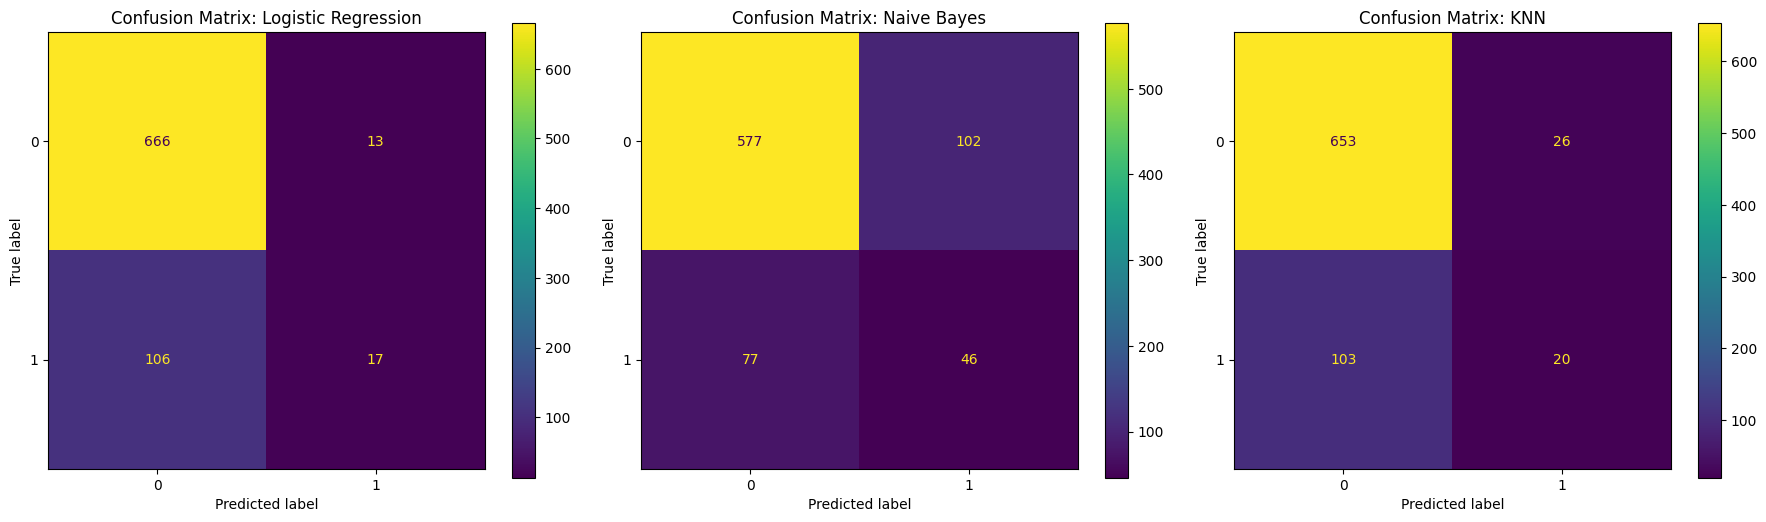

In [ ]:
# Creating visual comparison of model performance with confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generating confusion matrix for each baseline model
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_lr, ax=axes[0])
axes[0].set_title("Confusion Matrix: Logistic Regression")

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_nb, ax=axes[1])
axes[1].set_title("Confusion Matrix: Naive Bayes")

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn, ax=axes[2])
axes[2].set_title("Confusion Matrix: KNN")

# Improving visual layout
plt.tight_layout()
plt.show()

*This code creates ROC (Receiver Operating Characteristic) curves for comparing our baseline models before hyperparameter tuning. The ROC curve plots the True Positive Rate against the False Positive Rate at various classification thresholds.*

*The Area Under the Curve (AUC) provides a single measure of model performance:*
- *AUC = 1.0: Perfect classification*
- *AUC = 0.5: No better than random guessing*

*Higher AUC values indicate better model performance, allowing us to compare models regardless of the specific threshold chosen for classification.*

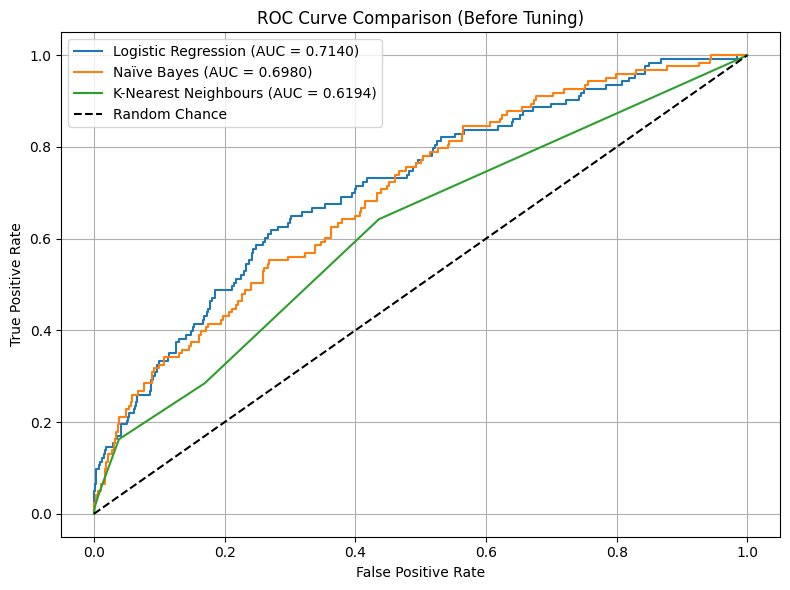

In [ ]:
# Preparing for ROC curve analysis
from sklearn.metrics import roc_curve, auc

# Organizing models for consistent processing
models = {
    "Logistic Regression": lr,
    "Naïve Bayes": nb,
    "K-Nearest Neighbours": knn
}

# Creating ROC curve visualization
plt.figure(figsize=(8, 6))

# Generating curve for each baseline model
for model_name, model in models.items():
    # Using appropriate test data format for each model
    if model_name == "Naïve Bayes":
        Y_probs = model.predict_proba(X_test)[:, 1]
    else:
        Y_probs = model.predict_proba(X_test_scaled)[:, 1]

    # Calculating ROC curve coordinates
    fpr, tpr, _ = roc_curve(Y_test, Y_probs)

    # Calculating area under curve
    auc_score = auc(fpr, tpr)

    # Plotting the curve with performance metric
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")

# Adding reference line for random performance
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

# Configuring visualization appearance
plt.title("ROC Curve Comparison (Before Tuning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Hyperparameter Tuning

*This code optimizes our Naive Bayes model by testing different values of the var_smoothing parameter, which controls how much variance is added to stabilize calculations. Use GridSearchCV to:*
1. *Try 10 different parameter values on a logarithmic scale*
2. *Use 5-fold cross-validation to evaluate each combination*
3. *Select the best performing configuration*

*The optimized model is then evaluated on our test set to measure improvement over the baseline Naive Bayes model.*

In [ ]:
# Optimizing Naive Bayes model through hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, 10)
}

# Performing exhaustive grid search with cross-validation
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)
grid_search_nb.fit(X_train, Y_train)

# Extracting best-performing model configuration
best_model_nb = grid_search_nb.best_estimator_

# Evaluating optimized model
Y_pred_best_nb = best_model_nb.predict(X_test)

# Displaying optimization results
print("Best Naïve Bayes Params:", grid_search_nb.best_params_)
print("Classification Report:\n", classification_report(Y_test, Y_pred_best_nb))

Best Naïve Bayes Params: {'var_smoothing': np.float64(1.0)}
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       679
           1       0.00      0.00      0.00       123

    accuracy                           0.85       802
   macro avg       0.42      0.50      0.46       802
weighted avg       0.72      0.85      0.78       802



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*This code optimizes our Logistic Regression model by testing combinations of:*
- *C: Regularization strength (inverse - smaller values mean stronger regularization)*
- *solver: Algorithm used for optimization problem*
- *penalty: Type of regularization used*

*Use of GridSearchCV with 5-fold cross-validation to find the parameter combination that produces the best performance. The max_iter parameter is increased to ensure convergence during the optimization process. The best model is evaluated on our test set to measure the improvement gained from hyperparameter tuning.*

In [ ]:
# Optimizing Logistic Regression through hyperparameter tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Searching for optimal parameter combination
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, Y_train)

# Extracting best-performing model
best_model_lr = grid_search_lr.best_estimator_
Y_pred_best_lr = best_model_lr.predict(X_test_scaled)

# Displaying optimization results
print("Best Logistic Regression Params:", grid_search_lr.best_params_)
print("Classification Report:\n", classification_report(Y_test, Y_pred_best_lr))

Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       679
           1       0.53      0.14      0.22       123

    accuracy                           0.85       802
   macro avg       0.70      0.56      0.57       802
weighted avg       0.81      0.85      0.81       802



*This code optimizes our K-Nearest Neighbors model by testing combinations of:*
- *n_neighbors: Number of neighbors to consider (k value)*
- *weights: How to weight neighbor votes (equal or by distance)*
- *metric: How to calculate distance between samples*

*GridSearchCV with 5-fold cross-validation tests all 16 possible combinations to find the optimal configuration. The best model is evaluated on our test set to measure the performance improvement gained through parameter optimization.*

In [ ]:
# Optimizing K-Nearest Neighbors through hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Searching for optimal parameter combination
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, Y_train)

# Extracting best-performing model
best_model_knn = grid_search_knn.best_estimator_
Y_pred_best_knn = best_model_knn.predict(X_test_scaled)

# Displaying optimization results
print("Best KNN Params:", grid_search_knn.best_params_)
print("Classification Report:\n", classification_report(Y_test, Y_pred_best_knn))

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       679
           1       0.47      0.14      0.21       123

    accuracy                           0.84       802
   macro avg       0.67      0.56      0.56       802
weighted avg       0.80      0.84      0.81       802



## 10. Evaluating Optimized Models

*This code creates confusion matrices for all three optimized models side by side. Using a blue color gradient, each matrix visually represents the classification performance after hyperparameter tuning. This allows us to directly compare how tuning affected each model's ability to correctly classify both classes and see which model produces the fewest misclassifications.*

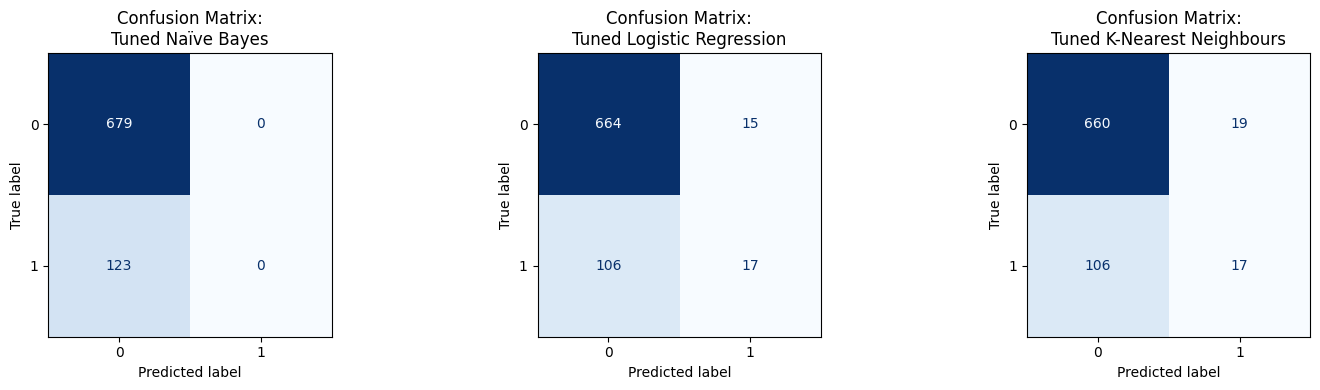

In [ ]:
# Comparing confusion matrices for all optimized models
models = [
    ("Tuned Naïve Bayes", Y_pred_best_nb),
    ("Tuned Logistic Regression", Y_pred_best_lr),
    ("Tuned K-Nearest Neighbours", Y_pred_best_knn),
]

# Creating visual layout
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Generating confusion matrix for each optimized model
for ax, (model_name, Y_pred) in zip(axes, models):
    cm_display = ConfusionMatrixDisplay.from_predictions(
        Y_test, Y_pred, ax=ax, cmap='Blues', colorbar=False
    )
    ax.set_title(f'Confusion Matrix:\n{model_name}')
    ax.grid(False)

# Optimizing visualization layout
plt.tight_layout()
plt.show()

*This code creates the final ROC curve comparison for our three optimized models. Each curve shows how well the model can distinguish between classes across all possible classification thresholds. The AUC (Area Under Curve) values quantify each model's discriminative power - higher values indicate better performance.*

*This visualization helps us determine which of our optimized models performs best for breast cancer mortality prediction and quantifies the improvement achieved through hyperparameter tuning compared to the baseline models.*

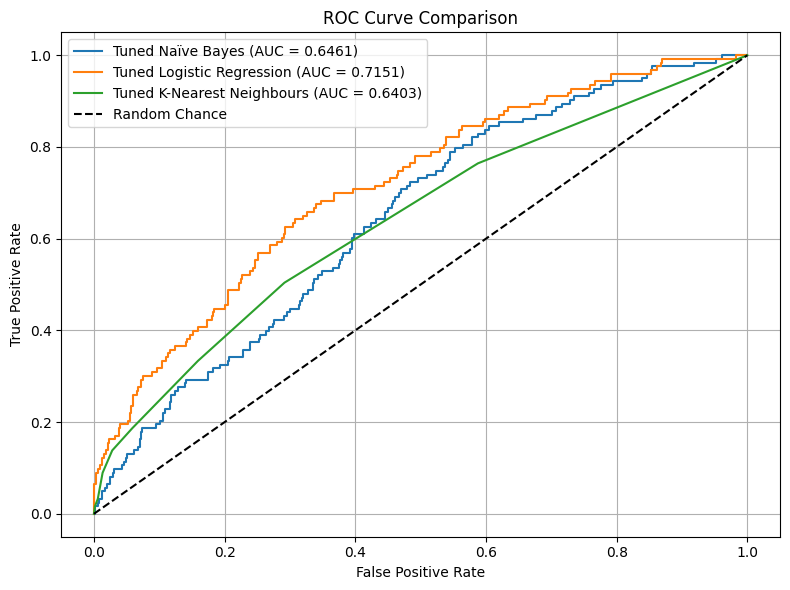

In [ ]:
# Creating final ROC curve comparison for optimized models
plt.figure(figsize=(8, 6))

# Generating curve for each tuned model
for model_name, model, X_input in [
    ("Tuned Naïve Bayes", best_model_nb, X_test),
    ("Tuned Logistic Regression", best_model_lr, X_test_scaled),
    ("Tuned K-Nearest Neighbours", best_model_knn, X_test_scaled)
]:
    # Getting class probabilities (not just binary predictions)
    Y_probs = model.predict_proba(X_input)[:, 1]

    # Calculating ROC curve coordinates
    fpr, tpr, _ = roc_curve(Y_test, Y_probs)

    # Calculating area under curve
    auc_score = auc(fpr, tpr)

    # Plotting the curve with performance metric
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")

# Adding reference line for random performance
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

# Configuring visualization appearance
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()